## Testing out the e-greedy Bandit and Simple Agent

This is to test out the classes KArmedRandomNormalBandit and GreedyBandit, the most basic form of the k-armed bandit.

In [57]:
import toybandit, greedyagent
import numpy as np


import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
k = 10
num_steps = 1000

In [17]:
#initialise some instances of a greedy bandit and agent

bandit = toybandit.KArmedRandomNormalBandit(k)
agent = greedyagent.GreedyAgent(bandit, 0.1)

In [18]:
# run some number of timesteps

agent.run_trial(num_steps)

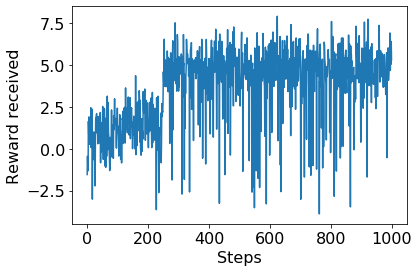

In [19]:
#do a quick plot of the rewards

fig, ax = plt.subplots(figsize=(6,4))
ax.plot(agent.reward_trajectory)
ax.tick_params(labelsize=16)
ax.set_xlabel('Steps', fontsize=16)
ax.set_ylabel('Reward received', fontsize=16)
plt.show()


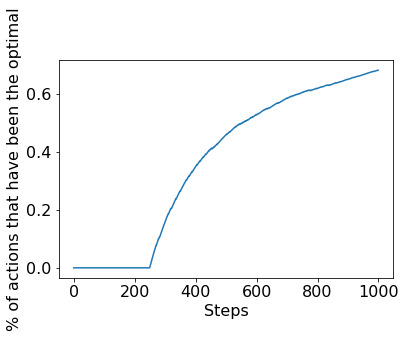

In [20]:
fig, ax = plt.subplots(figsize=(6,4))
ax.plot(agent.optimal_trajectory)
ax.tick_params(labelsize=16)
ax.set_xlabel('Steps', fontsize=16)
ax.set_ylabel('% of actions that have been the optimal', fontsize=16)
plt.show()

In [21]:
agent.n

[9, 12, 9, 14, 128, 7, 6, 10, 681, 124]

In [22]:
agent.best_arm

8

In [23]:
agent.num_optimal_pulls

681

## Comparison of different values of e to check

(using tdqm progress bars to monitor -- these are awesome! https://github.com/tqdm/tqdm)

In [25]:
from tqdm import tqdm_notebook

In [26]:
num_trials = 1000
epsilons_to_test = [0.01, 0.1, 1]

In [45]:
mean_traj = []
optimal_traj = []
for eps in epsilons_to_test:
    
    reward_trajectory_alltrials = []
    optimal_trajectory_alltrials = []
    
    for n in tqdm_notebook(range(num_trials)):
        bandit = bandits.KArmedRandomNormalBandit(k)
        agent = agents.GreedyAgent(bandit, eps)
        
        #actually run the trial
        agent.run_trial(num_steps)
        
        reward_trajectory_alltrials.append(agent.reward_trajectory)
        optimal_trajectory_alltrials.append(agent.optimal_trajectory)
    
    #take a mean across all trials for each of the epsilons, preserving trajectory information in time
    mean_traj.append(np.mean(np.array(reward_trajectory_alltrials), axis = 0))
    optimal_traj.append(np.mean(np.array(optimal_trajectory_alltrials), axis = 0))

In [49]:
len(mean_traj)

3

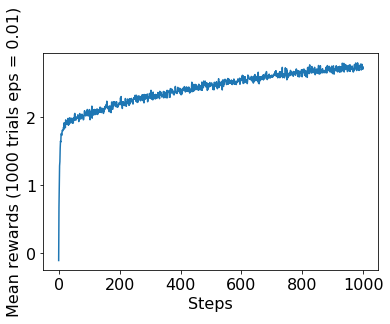

In [51]:
fig, ax = plt.subplots(figsize=(6,4))
ax.plot(mean_traj[0])
ax.tick_params(labelsize=16)
ax.set_xlabel('Steps', fontsize=16)
ax.set_ylabel('Mean rewards (1000 trials eps = 0.01)', fontsize=16)
plt.show()

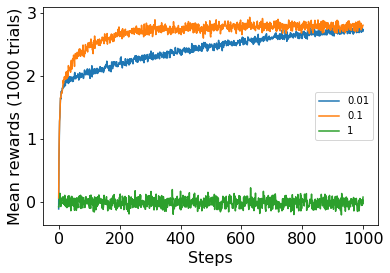

In [56]:
fig, ax = plt.subplots(figsize=(6,4))
for i, eps in enumerate(epsilons_to_test):
    ax.plot(mean_traj[i], label = str(eps))
ax.legend()
ax.tick_params(labelsize=16)
ax.set_xlabel('Steps', fontsize=16)
ax.set_ylabel('Mean rewards (1000 trials)', fontsize=16)
plt.show()

This shows us exactly what you would expect: too little opportunity for exploration and convergence on the optimum is slow, too much (high epsilon) and you never learn anything. 